In [1]:
import geopandas as gpd

/home/metamat/anicka/META/block/venv/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Loading bridge geo data

In [2]:
df_geo = gpd.read_file('../../data/mosty_shp/mosty.shp')
crs = df_geo.crs;

In [3]:
df_geo.head(3)

,Elevation,Shape_Leng,Shape_Area,AKTUALIZAC,ID_MOST,geometry
0,352.404,30.274879,31.271576,None,650,"POLYGON Z ((-752364.129 -1038276.044 352.404, ..."
1,352.404,46.201840,50.956139,None,650,"POLYGON Z ((-752362.440 -1038278.096 352.404, ..."
2,352.404,53.635510,60.617815,None,650,"POLYGON Z ((-752344.137 -1038269.891 352.404, ..."


In [4]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80356 entries, 0 to 80355
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Elevation   80356 non-null  float64 
 1   Shape_Leng  80356 non-null  float64 
 2   Shape_Area  80356 non-null  float64 
 3   AKTUALIZAC  330 non-null    object  
 4   ID_MOST     80356 non-null  int64   
 5   geometry    80356 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
print("Unique bridge count:",len(df_geo.ID_MOST.unique()))

Unique bridge count: 672


### Joining geometries by bridge ID

In [6]:
"""
Valid with multipylygon.buffer(0) but dissolve(by='') is better


from shapely.geometry import MultiPolygon, Polygon

# groupby ID
mosty_geo = df_geo.groupby('ID_MOST')

#extract only bridge geometry and ID
combined_geo = []
for most_id, most in mosty_geo:
    # combine geometry to multiplygon
    most_gdf = gpd.GeoDataFrame()
    most_gdf['geometry'] = [MultiPolygon(most.geometry.values).buffer(0)]
    most_gdf['ID_MOST'] = [most_id]
    if most_id == 417:
        most_gdf.plot(figsize=(20,20), cmap='coolwarm')
        print(most.geom_type.value_counts())
        print(most_gdf.is_valid)

    combined_geo.append(most_gdf)
""";

                                                  geometry
ID_MOST                                                   
1        POLYGON Z ((-748294.562 -1057917.283 341.702, ...
2        POLYGON Z ((-746393.872 -1056110.846 195.627, ...


<AxesSubplot:>

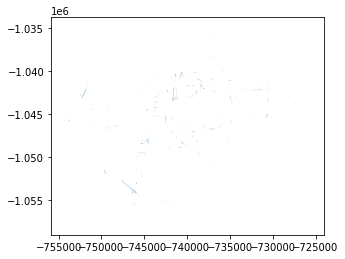

In [7]:
#extract only bridge geometry and ID
dissolved = df_geo[["ID_MOST","geometry"]].dissolve(by='ID_MOST')
print(dissolved.head(2))
dissolved.plot()

#m = gpd.GeoDataFrame(dissolved.loc[[417,422],:])
#m.plot(figsize=(20,20))
#m.is_valid

In [8]:
#df_geo = pd.concat(combined_geo)
#df_geo.reset_index(drop=True,inplace=True)
#df_geo = df_geo.set_crs(crs)

df_geo = dissolved.reset_index()
df_geo.head(10)
df_geo.to_file("../../data/mosty_shp/mosty_unique.shp", driver="ESRI Shapefile", encoding="utf-8")

In [9]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID_MOST   672 non-null    int64   
 1   geometry  672 non-null    geometry
dtypes: geometry(1), int64(1)
memory usage: 10.6 KB


## Prepare metadata for linking - only magistrat bridges for now

In [10]:
df_meta = gpd.read_file('../../data/mosty_shp/mosty_magistrat.shp')
df_meta = df_meta.set_crs(crs)

In [11]:
df_meta.head(2)

,Id,Jmeno,MistniNaze,ProhlidkaP,PosledniPr,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre,GPS_Lat,GPS_Lng,geometry
0,178b797b-a65e-493f-8be3-1b853d5f6d9b,Lávka na žel. most - jih,None,11.01.2022 Hlavní prohlídka,2022-01-11,V-025,3,III - Dobrý,Magistrát hlavního města Prahy,Praha 2,TSK PRAHA,"50,067","14,414",POINT (-743634.378 -1045196.960)
1,e0e4a06d-f98c-4ec6-8849-57d513adb27d,Palackého,None,14.01.2022 Hlavní prohlídka,2022-01-14,V-024,6,VI - Velmi špatný,Magistrát hlavního města Prahy,Praha 2,TSK PRAHA,"50,073","14,412",POINT (-743685.163 -1044516.347)


In [12]:
df_meta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          136 non-null    object  
 1   Jmeno       136 non-null    object  
 2   MistniNaze  9 non-null      object  
 3   ProhlidkaP  135 non-null    object  
 4   PosledniPr  135 non-null    object  
 5   Oznaceni    136 non-null    object  
 6   Stav        136 non-null    int64   
 7   PopisStavu  135 non-null    object  
 8   SpravaOrga  136 non-null    object  
 9   SpravaProv  108 non-null    object  
 10  SpravaStre  136 non-null    object  
 11  GPS_Lat     136 non-null    object  
 12  GPS_Lng     136 non-null    object  
 13  geometry    136 non-null    geometry
dtypes: geometry(1), int64(1), object(12)
memory usage: 15.0+ KB


## Execute spatial join on geometry and metadata geodataframes

In [13]:
df_merged = gpd.sjoin_nearest(df_geo, df_meta, how='left', max_distance=90)

In [14]:
df_merged.encoding = 'utf-8'

In [15]:
df_merged.describe()

,ID_MOST,index_right,Stav
count,688.000000,124.000000,124.000000
mean,338.760174,66.346774,4.774194
std,196.538219,37.232088,0.872700
min,1.000000,0.000000,0.000000
25%,166.750000,37.500000,5.000000
50%,335.500000,67.500000,5.000000
75%,509.250000,95.500000,5.000000
max,682.000000,135.000000,6.000000


In [16]:
df_selection = df_merged[["geometry","ID_MOST","Jmeno","ProhlidkaP","Oznaceni","Stav","PopisStavu","SpravaOrga","SpravaProv","SpravaStre"]]

### Deal with merge duplicities

In [17]:
df_selection.head(2)

,geometry,ID_MOST,Jmeno,ProhlidkaP,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre
0,"POLYGON Z ((-748294.562 -1057917.283 341.702, ...",1,Baně,10.11.2020 Mimořádná prohlídka,X-053,5.0,V - Špatný,Magistrát hlavního města Prahy,Praha 4,TSK PRAHA
1,"POLYGON Z ((-746393.872 -1056110.846 195.627, ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_selection.ID_MOST.value_counts()[:2]

192    2
334    2
Name: ID_MOST, dtype: int64

In [19]:
df_selection[df_selection.ID_MOST == 53]

,geometry,ID_MOST,Jmeno,ProhlidkaP,Oznaceni,Stav,PopisStavu,SpravaOrga,SpravaProv,SpravaStre
51,"POLYGON Z ((-745877.461 -1053041.594 199.850, ...",53,Most přes Berounku u Lahovic,23.11.2016 Hlavní prohlídka,V-071..1,3.0,III - Dobrý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA
51,"POLYGON Z ((-745877.461 -1053041.594 199.850, ...",53,Most přes Berounku u Lahovic,23.11.2016 Hlavní prohlídka,V-071..2,3.0,III - Dobrý,Magistrát hlavního města Prahy,Praha 5,TSK PRAHA


In [20]:
df_unique = df_selection.drop_duplicates(subset=["ID_MOST"], keep='first')

### Rename columns and export to SHP

In [21]:
column_names = {
    "ID_MOST": "ID",
    "Jmeno": "NAME",
    "ProhlidkaP": "LAST_UPDATE",
    "Oznaceni": "CODE",
    "Stav": "STATUS",
    "PopisStavu": "S_DESC",
    "SpravaOrga": "ADMIN",
    "SpravaProv": "MUNICIP",
    "SpravaStre": "AUTHORITY"
}

In [22]:
df_unique.rename(columns=column_names, inplace=True)

/tmp/ipykernel_16911/4191247272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.rename(columns=column_names, inplace=True)


In [23]:
df_unique.to_file("../../data/mosty_shp/mosty_meta.shp", driver="ESRI Shapefile", encoding="utf-8")

/tmp/ipykernel_16911/107891774.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_unique.to_file("../../data/mosty_shp/mosty_meta.shp", driver="ESRI Shapefile", encoding="utf-8")
